<a href="https://colab.research.google.com/github/ngonzalezromo/skullbase-res/blob/main/Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Nicolas Gonzalez-Romo, MD

Machine learning coding example: MNIST dataset

In [1]:
#Import required libraries and MNIST dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model


In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

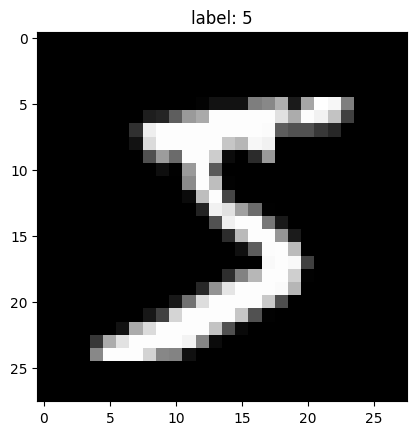

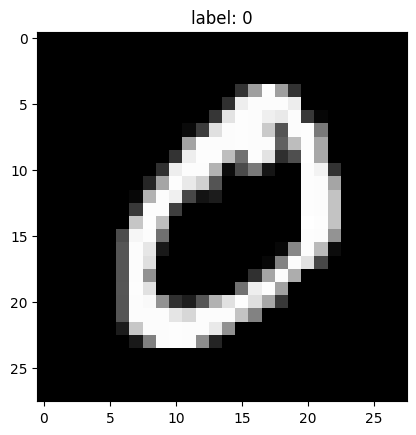

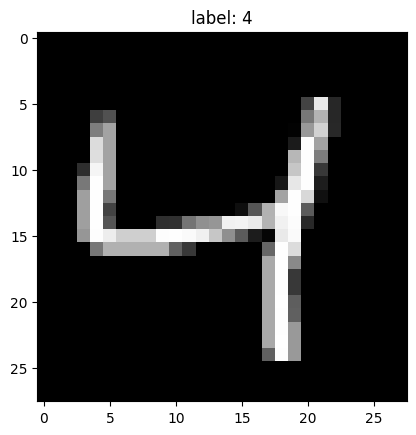

In [3]:
#View an item of  the dataset
for i in range(3):
  fig,ax=plt.subplots()
  plt.imshow(x_train[i],cmap='gray')
  plt.title(f'label: {y_train[i]}')

In [4]:
# view in pixel format
for i in range(1):
  print(x_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [6]:
# Create the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flattens the input images
model.add(Dense(128, activation='relu'))  # Hidden layer with 128 neurons and ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons and softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


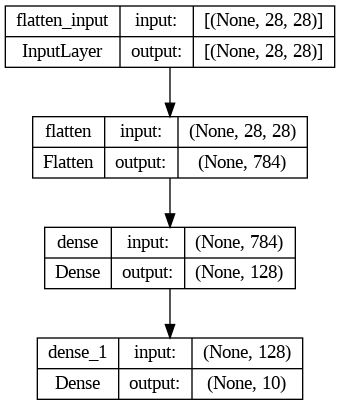

In [8]:
plot_model(model, to_file='model_graph.png', show_shapes=True)


In [9]:
# Train the model
history=model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2513 - accuracy: 0.9276
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1106 - accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0759 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0348 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0225 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0182 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.0754459947347641
Test Accuracy: 0.9793000221252441


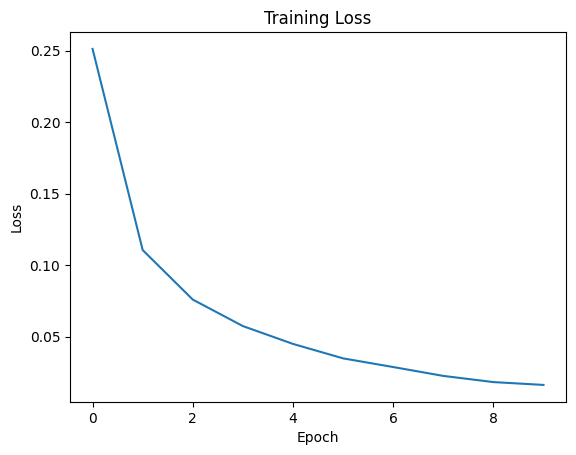

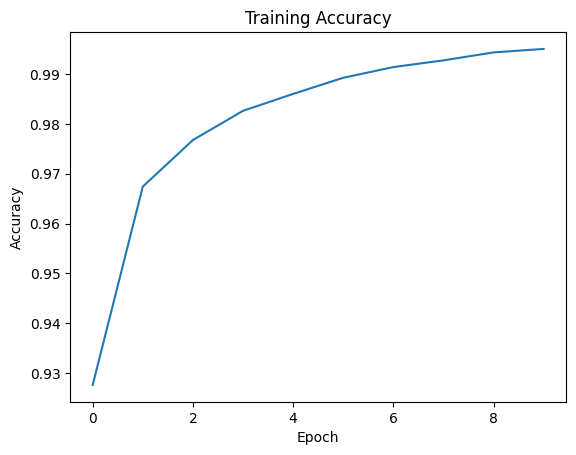

In [11]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

1/1 [==============================] - 0s 71ms/step


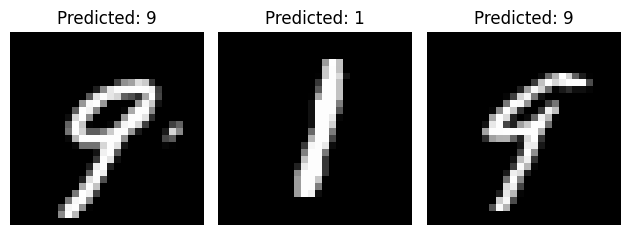

In [12]:
indices = np.random.randint(0, len(x_test), size=3)

# Make predictions for the selected indices
predictions = model.predict(x_test[indices])

# Plot the predicted images
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(x_test[indices[i]], cmap='gray')
    plt.title(f'Predicted: {np.argmax(predictions[i])}')
    plt.axis('off')

plt.tight_layout()
plt.show()